<a href="https://colab.research.google.com/github/masao1112/MLFromScratch/blob/main/%5BOn_going%5DKMeanClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
import sklearn

In [ ]:
X, y, centers = make_blobs(n_samples=100, n_features=2, random_state=42, return_centers=True)

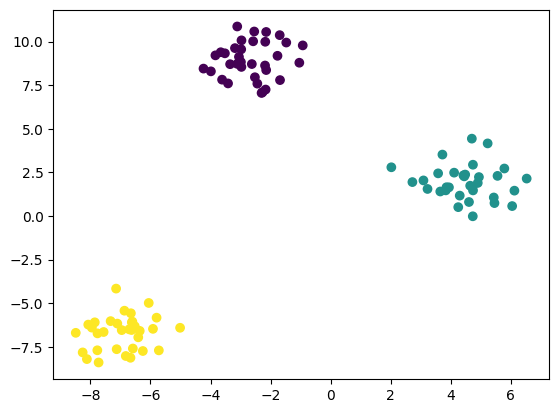

In [ ]:
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [ ]:
# Assign data points to cluster by calculateing the euclidean distance between data point and each cluster's centroid
def find_nearest_centroid(centroids, data):
  cluster_distances = np.sqrt((centroids - data)**2).sum(axis=1)
  return np.argmin(cluster_distances)

In [ ]:
# randomly initiate centroids
centroids = X[np.random.choice(X.shape[0], 2, replace=False)]

In [ ]:
find_nearest_centroid(centroids, X[1])

np.int64(0)

In [ ]:
# move cluster centroids
"""
Args:
  labels: a list of cluster indices wrt each example
  training_data: traning examples
  k: number of clusters

Return:
  weighted average of points in cluster
"""
def move_clusters(X, labels, k: int):
  m, n = X.shape
  centroids = np.zeros((k, n))
  for i in range(k):
    centroids[i] = np.mean(X[labels == i], axis=0)
  return centroids

In [ ]:
move_clusters(np.array([0, 1, 1, 0]),
              X[:4], 2)

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
# Compute distortion loss
def compute_distortion(X, labels, centroids):
  m, n = X.shape
  loss = 0
  for i in range(m):
    # compute euclidean distance between each sample and correspond centroid
    loss += np.sqrt((X[i] - centroids[int(labels[i])])**2).sum()
  return loss / m

In [ ]:
def compute_intertia(X, labels, centroids):
  m, n = X.shape
  inertia = 0
  for i in range(m):
    idx = int(labels[i])
    inertia += np.sum((X[i] - centroids[idx])**2)
  return inertia

In [ ]:
def KMeansClustering(X, k=3, n_iters=10):
  # randomly initiate centroids
  centroids = X[np.random.choice(X.shape[0], k, replace=False)]

  for i in range(n_iters):
    # reset centroid's index holder
    labels = np.zeros(X.shape[0])
    # Assign datapoints to cluster
    for j in range(X.shape[0]):
      labels[j] = find_nearest_centroid(centroids, X[j])
    centroids = move_clusters(X, labels, k)
    # Compute the loss
    loss = compute_distortion(X, labels, centroids)
  return centroids, loss

In [ ]:
def plot_clusters(X, y, centroids, predicted_centroids=None):
  plt.scatter(X[:, 0], X[:, 1], c=y)
  plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x')
  if predicted_centroids is not None:
    plt.scatter(predicted_centroids[:, 0], predicted_centroids[:, 1], c='b', marker='x')
  plt.show()

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
X = data.data
y = data.target
attrs = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
splitted_X = X[:, 1:3]
splitted_X.shape

(150, 2)

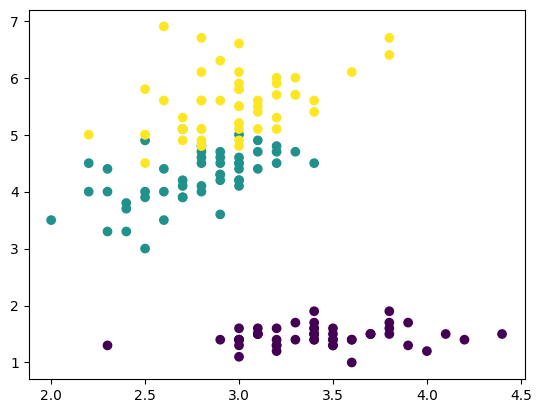

In [ ]:
plt.scatter(splitted_X[:, 0], splitted_X[:, 1], c=data.target)
plt.show()

In [ ]:
for i in range(50):
  iris_centroids, loss = KMeansClustering(splitted_X, 3, 10)
  print(iris_centroids, loss)

[[3.428      1.462     ]
 [3.07179487 5.72564103]
 [2.7442623  4.38196721]] 0.5567728065013313
[[2.7442623  4.38196721]
 [3.07179487 5.72564103]
 [3.428      1.462     ]] 0.5567728065013313
[[3.428      1.462     ]
 [3.07179487 5.72564103]
 [2.7442623  4.38196721]] 0.5567728065013313
[[3.41621622 1.38648649]
 [3.39285714 1.77142857]
 [2.87575758 4.92525253]] 0.7436420056420054
[[3.428      1.462     ]
 [2.73793103 4.34827586]
 [3.05714286 5.67619048]] 0.5581970005473457
[[2.7442623  4.38196721]
 [3.07179487 5.72564103]
 [3.428      1.462     ]] 0.5567728065013313
[[2.7442623  4.38196721]
 [3.07179487 5.72564103]
 [3.428      1.462     ]] 0.5567728065013313
[[2.75       4.39032258]
 [3.428      1.462     ]
 [3.07105263 5.74736842]] 0.5568570005659308
[[3.07179487 5.72564103]
 [3.428      1.462     ]
 [2.7442623  4.38196721]] 0.5567728065013313
[[3.03617021 5.60212766]
 [3.428      1.462     ]
 [2.72641509 4.28867925]] 0.5592578723404253
[[3.07179487 5.72564103]
 [2.7442623  4.38196721]


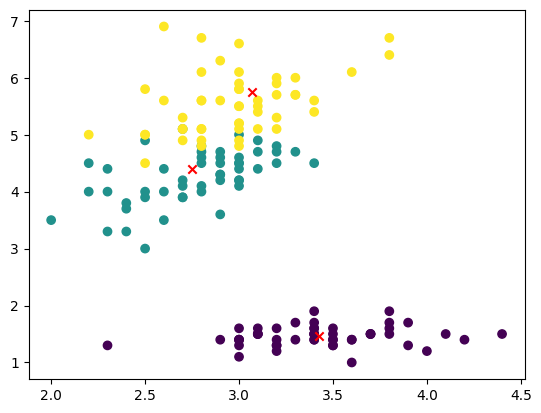

In [ ]:
plot_clusters(splitted_X, data.target, iris_centroids)

In [ ]:
class KMeansClustering():
  def __init__(self, k=3, n_iters=10):
    self.k = k
    self.n_iters = n_iters

  def fit(self, X, y=None):
    k = self.k
    n_iters = self.n_iters
    m, n = X.shape
    # randomly initiate centroids
    centroids = X[np.random.choice(m, k, replace=False)]

    for i in range(n_iters):
      # reset cluster's index holder
      labels = np.zeros(m)
      # Assign datapoints to cluster
      for j in range(m):
        labels[j] = find_nearest_centroid(centroids, X[j])
      centroids = move_clusters(X, labels, k)
      # Compute the inertia
      loss = compute_distortion(X, labels, centroids)

    self.cluster_centers_ = centroids
    self.loss_ = loss
    self.labels_ = labels

  def predict(self, X):
    labels = np.zeros(X.shape[0])
    for j in range(X.shape[0]):
      labels[j] = find_nearest_centroid(self.centroids, X[j])
    return labels

  def score(self, X):
    return compute_intertia(X, self.labels_, self.cluster_centers_)

In [ ]:
clus = KMeansClustering(3, 10)
clus.fit(X)
clus.score(X)

np.float64(142.753520021645)

In [ ]:
kmeans = sklearn.cluster.KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.cluster_centers_
kmeans.labels_
kmeans.inertia_

78.85566582597727